# Regresión lineal del monto de facturación hospitalaria

## Primer de regresión lineal

En estadística, la regresión lineal es un enfoque lineal para modelar la relación entre una variable dependiente escalar y y una o más variables explicativas (o variables independientes) denominadas X. El caso de una variable explicativa se denomina regresión lineal simple. Para más de una variable explicativa, el proceso se denomina regresión lineal múltiple.

Los modelos de regresión lineal a menudo se ajustan utilizando el enfoque de mínimos cuadrados, pero también pueden ajustarse de otras formas, como minimizando la "falta de ajuste" en alguna otra norma (como con la regresión de desviaciones mínimas absolutas), o minimizando una penalización. versión de la función de pérdida por mínimos cuadrados como en la regresión de crestas (penalización de $L_2$ -norm) y lazo (penalización de $L_1$ -norm). Por el contrario, el enfoque de mínimos cuadrados se puede utilizar para ajustar modelos que no son modelos lineales. Por lo tanto, aunque los términos "mínimos cuadrados" y "modelo lineal" están estrechamente relacionados, no son sinónimos.

### Importando paquetes y el conjunto de datos

In [4]:
!pip install numpy pandas matplotlib seaborn scikit-learn

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [6]:
# df = pd.read_csv("https://github.com/ulewis/Ejemplos/raw/main/Datos/USA_Housing.csv")
df = pd.read_csv("https://github.com/ulewis/Ejemplos/raw/main/Datos/healthcare_dataset.csv")

df.head()  # vemos los 5 primeros datos del dataframe

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal


### Consultar información básica sobre el conjunto de datos

**El método 'info()'los tipos y números de datos**

In [12]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                10000 non-null  object 
 1   Age                 10000 non-null  int64  
 2   Gender              10000 non-null  object 
 3   Blood Type          10000 non-null  object 
 4   Medical Condition   10000 non-null  object 
 5   Date of Admission   10000 non-null  object 
 6   Doctor              10000 non-null  object 
 7   Hospital            10000 non-null  object 
 8   Insurance Provider  10000 non-null  object 
 9   Billing Amount      10000 non-null  float64
 10  Room Number         10000 non-null  int64  
 11  Admission Type      10000 non-null  object 
 12  Discharge Date      10000 non-null  object 
 13  Medication          10000 non-null  object 
 14  Test Results        10000 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 1.1+

**El método 'describe()' obtiene un resumen de estadísticas de las características del conjunto de datos**

In [13]:
df.describe()


,Age,Billing Amount,Room Number
count,10000.000000,10000.000000,10000.000000
mean,51.452200,25516.806778,300.082000
std,19.588974,14067.292709,115.806027
min,18.000000,1000.180837,101.000000
25%,35.000000,13506.523967,199.000000
50%,52.000000,25258.112566,299.000000
75%,68.000000,37733.913727,400.000000
max,85.000000,49995.902283,500.000000


**El método 'columns' obtiene los nombres de las columnas (características)**

In [ ]:
df.columns

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results'],
      dtype='object')

### Visualización básica del conjunto de datos

**Pairplots usando seaborn**

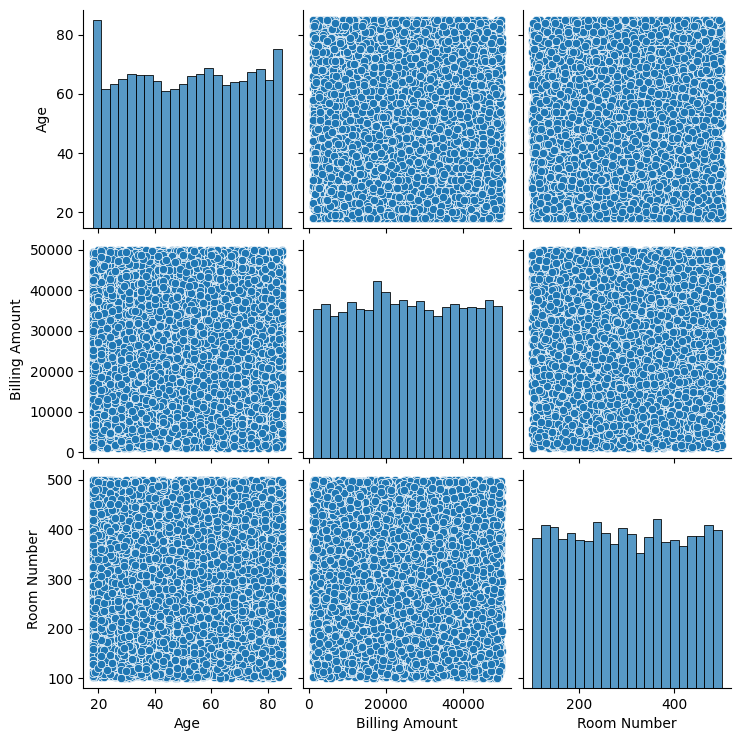

In [14]:
sns.pairplot(df)
plt.show()

**Distribución del monto de facturación hospitalaria (directo y claro)**

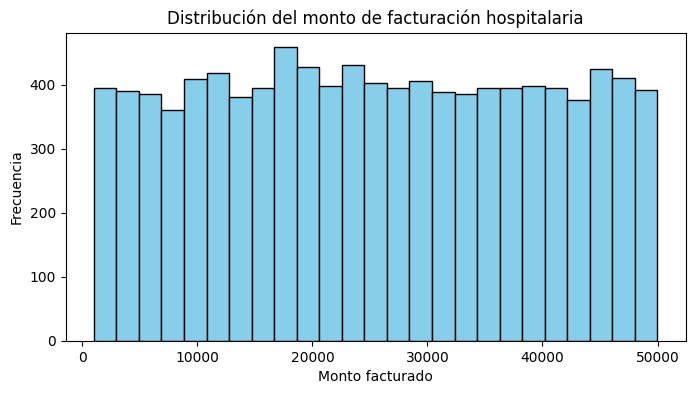

In [15]:
df['Billing Amount'].plot.hist(bins=25, figsize=(8,4), color="skyblue", edgecolor="black")
plt.title("Distribución del monto de facturación hospitalaria")
plt.xlabel("Monto facturado")
plt.ylabel("Frecuencia")
plt.show()

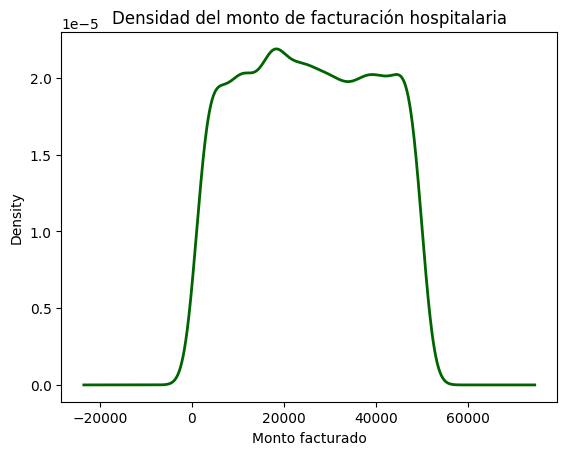

In [16]:
# Curva de densidad del monto de facturación hospitalaria
df['Billing Amount'].plot.density(color="darkgreen", linewidth=2)
plt.title("Densidad del monto de facturación hospitalaria")
plt.xlabel("Monto facturado")
plt.show()


**Matriz de correlación y heatmap**

In [17]:
# Seleccionar solo las columnas numéricas
numeric_df = df.select_dtypes(include=[np.number])

# Matriz de correlación
corr_matrix = numeric_df.corr()

corr_matrix


,Age,Billing Amount,Room Number
Age,1.000000,-0.009483,-0.005371
Billing Amount,-0.009483,1.000000,-0.006160
Room Number,-0.005371,-0.006160,1.000000


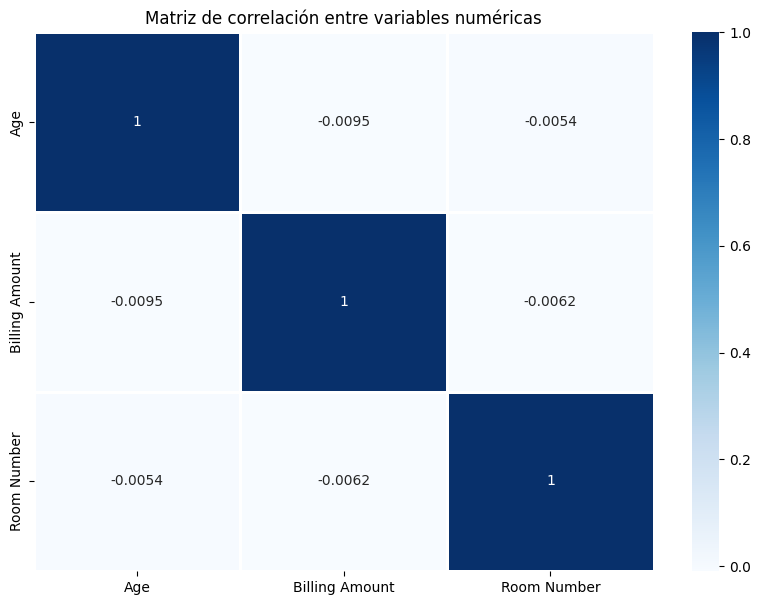

In [18]:
# Heatmap de correlaciones entre variables numéricas
plt.figure(figsize=(10,7))
sns.heatmap(numeric_df.corr(), annot=True, linewidths=2, cmap="Blues")
plt.title("Matriz de correlación entre variables numéricas")
plt.show()

### Conjuntos de características y variables

**Haga una lista de los nombres de las columnas del dataframe**

In [19]:
# Hacemos una lista de todas las columnas
l_column = list(df.columns)
len_feature = len(l_column)

print("Número total de columnas en el dataset:", len_feature)
print("Lista de columnas:")
print(l_column)

# Definir target y features
target = 'Billing Amount'
features = [col for col in df.columns if col not in ['Billing Amount', 'Name', 'Test Results']]

print("\nVariable objetivo (target):", target)
print("Número de features:", len(features))
print("Lista de features:")
print(features)

Número total de columnas en el dataset: 15
Lista de columnas:
['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition', 'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider', 'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date', 'Medication', 'Test Results']

Variable objetivo (target): Billing Amount
Número de features: 12
Lista de features:
['Age', 'Gender', 'Blood Type', 'Medical Condition', 'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider', 'Room Number', 'Admission Type', 'Discharge Date', 'Medication']


**Coloque todas las características numéricas en X and y, ignore la dirección, que es una cadena para la regresión lineal**

In [20]:
# Crear una nueva variable con la duración de la estancia hospitalaria
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])
df['Stay_Days'] = (df['Discharge Date'] - df['Date of Admission']).dt.days

# Definir target (y) y features (X)
y = df['Billing Amount']
X = df.drop(['Billing Amount', 'Name', 'Test Results', 'Date of Admission', 'Discharge Date'], axis=1)

In [21]:
print("Tamaño de Características (X):", X.shape)
print("Tamaño de Variable Objetivo (y):", y.shape)

Tamaño de Características (X): (10000, 11)
Tamaño de Variable Objetivo (y): (10000,)


In [22]:
print("\nPrimeras filas de X:")
display(X.head())


Primeras filas de X:


,Age,Gender,Blood Type,Medical Condition,Doctor,Hospital,Insurance Provider,Room Number,Admission Type,Medication,Stay_Days
0,81,Female,O-,Diabetes,Patrick Parker,Wallace-Hamilton,Medicare,146,Elective,Aspirin,14
1,35,Male,O+,Asthma,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,404,Emergency,Lipitor,14
2,61,Male,B-,Obesity,Paul Baker,Walton LLC,Medicare,292,Emergency,Lipitor,30
3,49,Male,B-,Asthma,Brian Chandler,Garcia Ltd,Medicare,480,Urgent,Penicillin,1
4,51,Male,O-,Arthritis,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,477,Urgent,Paracetamol,24


In [23]:
print("\nPrimeras filas de y:")
display(y.head())


Primeras filas de y:


0    37490.983364
1    47304.064845
2    36874.896997
3    23303.322092
4    18086.344184
Name: Billing Amount, dtype: float64

### División de entrenamiento-prueba

**Importamos la función train_test_split de scikit-learn**

In [24]:
from sklearn.model_selection import train_test_split

**Creamos los conjuntos de entrenamiento X y de prueba y en un comando usando una proporción de división y una semilla aleatoria**

In [25]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=123
)

**Verifique el tamaño y la forma de las divisiones de entrenamiento/prueba (debe estar en la proporción según el parámetro test_size anterior)**

In [26]:
print("Tamaño del conjunto de características del entrenamiento:", X_train.shape)
print("Tamaño del conjunto de características de prueba:", X_test.shape)
print("Tamaño de la variable objetivo del entrenamiento:", y_train.shape)
print("Tamaño de la variable objetivo de prueba:", y_test.shape)

Tamaño del conjunto de características del entrenamiento: (7000, 11)
Tamaño del conjunto de características de prueba: (3000, 11)
Tamaño de la variable objetivo del entrenamiento: (7000,)
Tamaño de la variable objetivo de prueba: (3000,)


### Ajuste y entrenamiento del modelo

**Importamos el estimador de modelo de regresión lineal de scikit-learn e lo instanciamos**

In [61]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import pandas as pd

In [28]:
# Identificar columnas numéricas y categóricas
numeric_features = ["Age", "Room Number", "Stay_Days"]
categorical_features = ["Gender", "Blood Type", "Medical Condition", 
                        "Doctor", "Hospital", "Insurance Provider", 
                        "Admission Type", "Medication"]

In [29]:
# Preprocesador: escala numéricas y codifica categóricas
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
    ]
)

In [62]:
# Pipeline con preprocesamiento + modelo
lm = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

**Ajustamos el modelo al propio objeto instanciado**

In [63]:
# Entrenamiento
lm.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


**Verificamos la intercepción y los coeficientes y los colocamos en un DataFrame**

In [64]:
# Obtener intercepto y coeficientes del modelo entrenado
intercepto = lm.named_steps["regressor"].intercept_
coeficientes = lm.named_steps["regressor"].coef_

In [65]:
print("El término de intersección del modelo lineal:", intercepto)
print("Cantidad de coeficientes aprendidos:", len(coeficientes))

El término de intersección del modelo lineal: 25348.434866649157
Cantidad de coeficientes aprendidos: 12947


In [67]:
# Como ya no tenemos columnas simples (porque OneHot crea muchas),
# construimos un DataFrame con el nombre de cada característica expandida:
feature_names = (lm.named_steps["preprocessor"]
                   .transformers_[0][2] +  # numéricas
                 list(lm.named_steps["preprocessor"]
                      .transformers_[1][1].get_feature_names_out(categorical_features)))

cdf = pd.DataFrame(data=coeficientes, index=feature_names, columns=["Coefficients"])
cdf.head(20)  # mostramos solo los primeros 20 para no saturar

,Coefficients
Age,-25.010723
Room Number,-7.095617
Stay_Days,-90.587702
Gender_Female,31.576837
Gender_Male,-31.576837
Blood Type_A+,-559.772401
Blood Type_A-,1281.437591
Blood Type_AB+,500.654008
Blood Type_AB-,76.728976
Blood Type_B+,-274.417130


### Cálculo de errores estándar y estadística t para los coeficientes

In [56]:
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

In [57]:
# Predicciones en entrenamiento
train_pred = lm.predict(X_train)

In [55]:
print("MSE (Error Cuadrático Medio):", round(mse, 2))
print("RMSE (Raíz del Error Cuadrático Medio):", round(rmse, 2))
print("R² (Coeficiente de Determinación):", round(r2, 3))

MSE (Error Cuadrático Medio): 18.24
RMSE (Raíz del Error Cuadrático Medio): 4.27
R² (Coeficiente de Determinación): 1.0


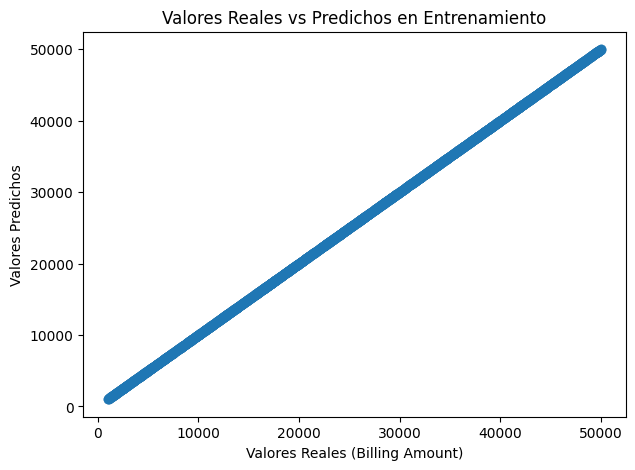

In [40]:
# --- Visualización ---
plt.figure(figsize=(7,5))
plt.scatter(y_train, train_pred, alpha=0.3)
plt.xlabel("Valores Reales (Billing Amount)")
plt.ylabel("Valores Predichos")
plt.title("Valores Reales vs Predichos en Entrenamiento")
plt.show()


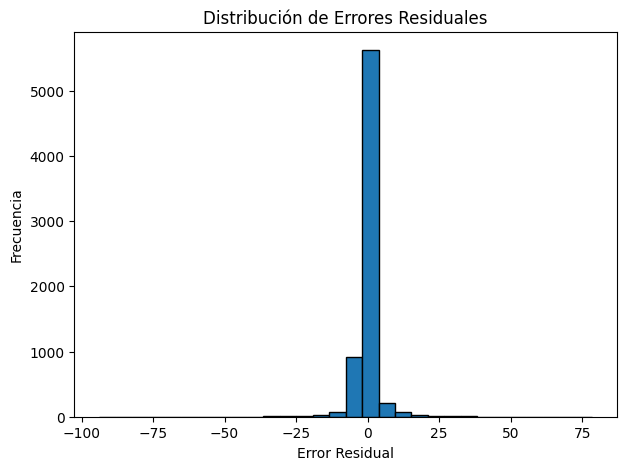

In [41]:
# Distribución de errores residuales
residuals = y_train - train_pred
plt.figure(figsize=(7,5))
plt.hist(residuals, bins=30, edgecolor="black")
plt.xlabel("Error Residual")
plt.ylabel("Frecuencia")
plt.title("Distribución de Errores Residuales")
plt.show()

### Matrices de evaluación de predicción, estimación de error y regresión

**Predicción usando el modelo lm**

In [42]:
# Predicciones en el conjunto de prueba
predictions = lm.predict(X_test)

print("Tipo del objeto predicho:", type(predictions))
print("Tamaño del objeto predicho:", predictions.shape)

Tipo del objeto predicho: <class 'numpy.ndarray'>
Tamaño del objeto predicho: (3000,)


**Diagrama de dispersión (Scatterplot) del precio previsto y el conjunto de prueba y para ver si los datos caen en una línea recta de 45 grados**

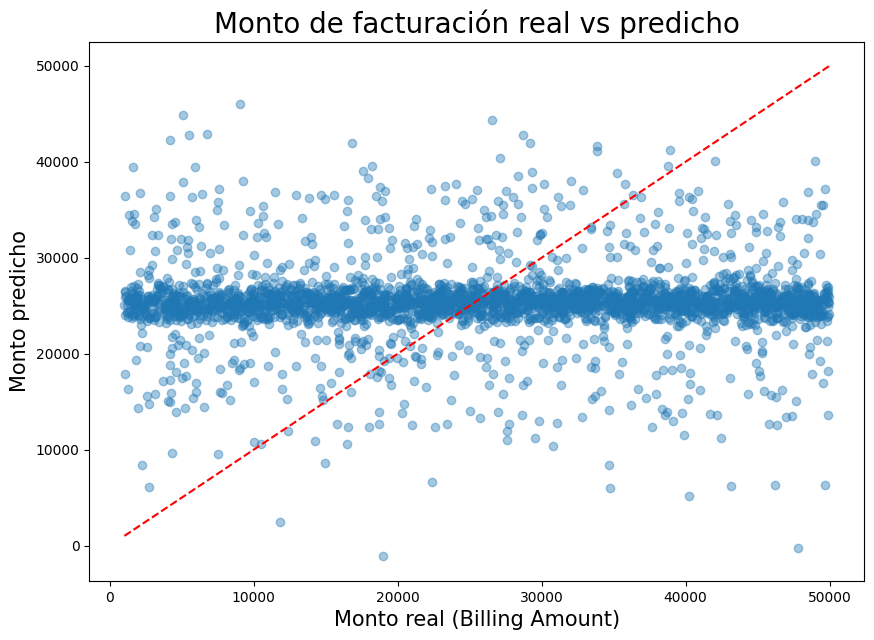

In [43]:
# --- Scatterplot Real vs Predicho ---
plt.figure(figsize=(10,7))
plt.title("Monto de facturación real vs predicho", fontsize=20)
plt.xlabel("Monto real (Billing Amount)", fontsize=15)
plt.ylabel("Monto predicho", fontsize=15)
plt.scatter(x=y_test, y=predictions, alpha=0.4)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # línea 45°
plt.show()

**Visualizamos el histograma de los residuos, es decir, errores predichos (se espera un patrón distribuido normalmente)**

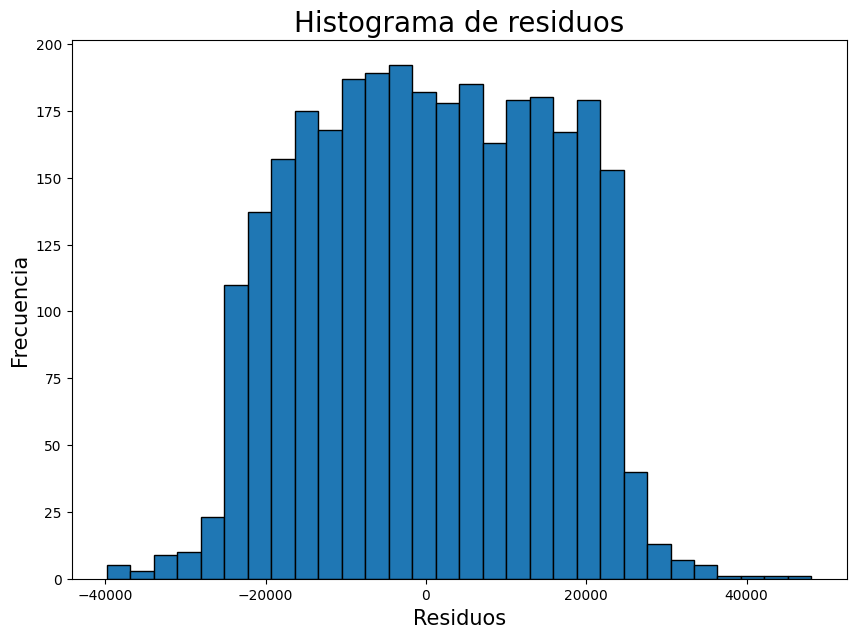

In [44]:
# --- Histograma de residuos ---
residuals = y_test - predictions
plt.figure(figsize=(10,7))
plt.title("Histograma de residuos", fontsize=20)
plt.xlabel("Residuos", fontsize=15)
plt.ylabel("Frecuencia", fontsize=15)
plt.hist(residuals, bins=30, edgecolor="black")
plt.show()

**Diagrama de dispersión de residuos y valores predichos (Homoscedasticidad)**


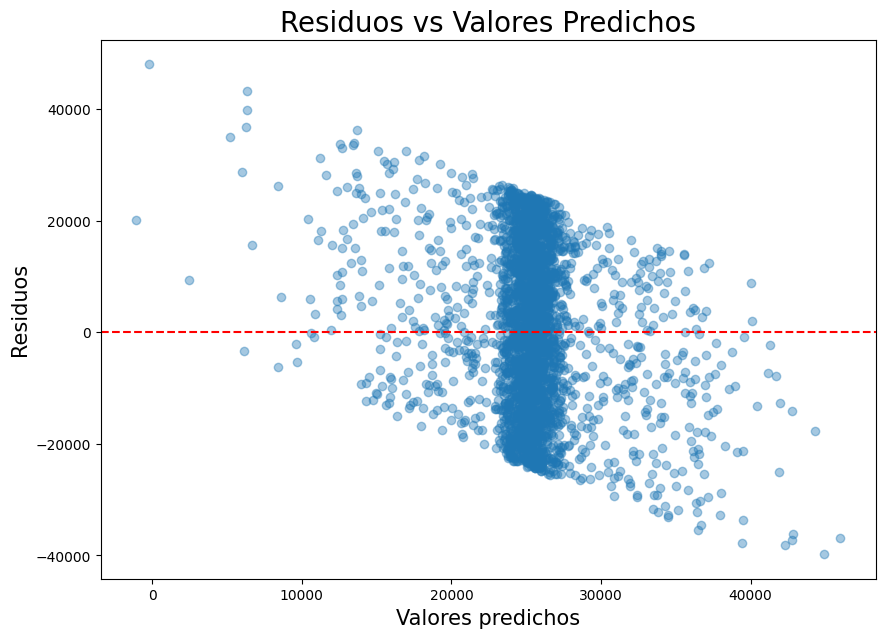

In [45]:
# --- Residuos vs Valores Predichos ---
plt.figure(figsize=(10,7))
plt.title("Residuos vs Valores Predichos", fontsize=20)
plt.xlabel("Valores predichos", fontsize=15)
plt.ylabel("Residuos", fontsize=15)
plt.scatter(x=predictions, y=residuals, alpha=0.4)
plt.axhline(y=0, color="red", linestyle="--")
plt.show()

**Métricas de evaluación de la regresión**

In [46]:
print("Mean Absolute Error (MAE):", round(metrics.mean_absolute_error(y_test, predictions), 2))
print("Mean Squared Error (MSE):", round(metrics.mean_squared_error(y_test, predictions), 2))
print("Root Mean Squared Error (RMSE):", round(np.sqrt(metrics.mean_squared_error(y_test, predictions)), 2))

Mean Absolute Error (MAE): 12491.67
Mean Squared Error (MSE): 215231319.33
Root Mean Squared Error (RMSE): 14670.76


**Valor R cuadrado**

In [59]:
print("Valor R-squared (R²):", round(metrics.r2_score(y_test, predictions), 3))

Valor R-squared (R²): -0.073
